##### this is my answer of Python for data science

In [175]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import pearsonr

import plotly.express as px

from scipy.stats import f_oneway

from scipy.stats import ttest_ind


# part 1

## 1. 

In [176]:
df = pd.read_csv ('gapminder_clean.csv')
df

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2602,Zimbabwe,1987,14.407528,1.598217,74.161607,878.072691,896.673611,24.015710,5.784,1.150737,21.274886,32.451242,7.189361,61.753805,24.649495,53.141236,9216418.0,Africa,706.157306
2603,2603,Zimbabwe,1992,7.413793,1.533724,43.120518,778.695133,923.493407,27.227263,4.840,-9.015570,36.485231,40.862069,-14.129659,56.491976,28.485762,51.724135,10704340.0,Africa,693.420786
2604,2604,Zimbabwe,1997,18.934082,1.194678,63.058320,870.988697,804.508892,37.595273,4.237,2.680594,44.609791,25.554678,-2.879048,46.065902,31.174507,55.511236,11404948.0,Africa,792.449960
2605,2605,Zimbabwe,2002,14.029007,0.942795,164.559047,827.329873,772.676619,31.834799,4.018,-8.894023,34.972553,NaN,2.712950,40.679146,32.807111,NaN,11926563.0,Africa,672.038623


## 2. 

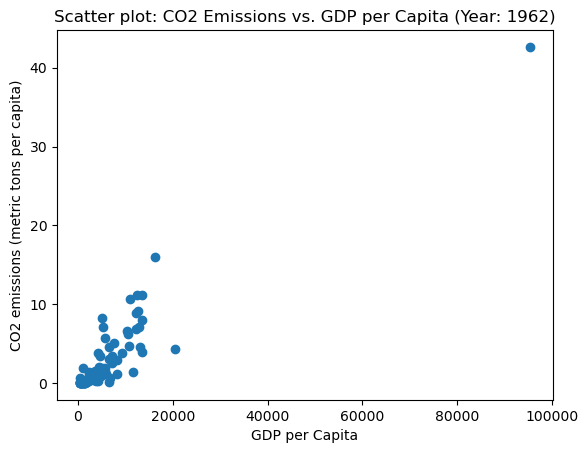

In [177]:
## filter
filtered_df = df[df['Year'] == 1962]
filtered_df


cogdp_df = filtered_df.loc[:, ['CO2 emissions (metric tons per capita)','gdpPercap']]
# Drop rows with NaN values
cogdp_df2 = cogdp_df.dropna()

co2_emissions = cogdp_df2['CO2 emissions (metric tons per capita)']
gdp_percap = cogdp_df2['gdpPercap']

## create scatter plot

plt.scatter(gdp_percap,co2_emissions)
plt.xlabel('GDP per Capita')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('Scatter plot: CO2 Emissions vs. GDP per Capita (Year: 1962)')

plt.show()


## 3.  

* correlation coefficient : 0.9260816725019472, means the strength and direction of the linear relationship, it's strong positive correlation, seems linear

* p-value:  1.1286792210038754e-46, which is < 0.05 means the correlation is statistically significant



In [178]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(co2_emissions, gdp_percap)

# Display the correlation coefficient and p-value
print("Correlation:", correlation)
print("P-value:", p_value)


Correlation: 0.9260816725019472
P-value: 1.1286792210038754e-46


## 4. 

The year 1967 has strongest correlation 0.9387918385063311

In [179]:
## 4. 

strongest_year = None
strongest_cor = 0     # the initial correlation is set to the smallest abs value as coefficient

lst=[]

years = df['Year'].unique()

for year in years:
    filter = df[df['Year'] == year]
    cogdp = filter.loc[:, ['CO2 emissions (metric tons per capita)','gdpPercap']]
    cogdp2 = cogdp.dropna()
    co2 = cogdp2['CO2 emissions (metric tons per capita)']
    gdp = cogdp2['gdpPercap']

    cor, p = pearsonr(co2, gdp)
    lst.append(cor)

    if abs(cor) > abs(strongest_cor):
        strongest_cor = cor
        strongest_year = year



print(f'The year {strongest_year} has strongest correlation {strongest_cor}')
    
    

The year 1967 has strongest correlation 0.9387918385063311


## 5. 

In [180]:
filtered_df2 = df[df['Year'] == 1967]

# Create an interactive scatter plot using Plotly
fig = px.scatter(filtered_df2, x='gdpPercap', y='CO2 emissions (metric tons per capita)', 
                 size='pop', color='continent',
                 title='CO2 Emissions vs. GDP per Capita (Year: 1967) ',
                 labels={'gdpPercap': 'GDP per Capita', 'CO2 emissions (metric tons per capita)': 'CO2 Emissions'})

# Customize the layout
fig.update_layout(showlegend=True)

# Show the plot
fig.show()


# part 2

## 1.  

* ANOVA: why?  
one predictor variable is categorical-- continent, one outcome variable is quantitaive-- Energy use; more than 2 groups/continents are being compared  ;

* p-value: 8.527003487154367e-39, the p-value is below a predetermined significance level (e.g., 0.05), which means there is significant evidence to reject the null hypothesis and conclude that there are differences in energy use across continents

* box plot:  
show there are differences in energy use across continents,  
X-axis: >2 categories (many continents), y-axis: one continuous varable(Energy use)


In [181]:
## stats test

df_1 = df.loc[:, ['continent','Energy use (kg of oil equivalent per capita)']].dropna() # remove row with Nan

grouped_data = df_1.groupby('continent')['Energy use (kg of oil equivalent per capita)'].apply(list)
grouped_data

# Perform the ANOVA test
result = f_oneway(*grouped_data)

# Print the result
print("ANOVA Result:")
print("p-value:", result.pvalue)

ANOVA Result:
p-value: 8.527003487154367e-39


In [182]:
# visualization: box plot

fig_1 = px.box ( df_1, x='continent', y='Energy use (kg of oil equivalent per capita)',
                color='continent',
                title='Energy Use by Continent',
                labels = {'Energy use (kg of oil equivalent per capita)': 'Energy use'} )

fig_1.show()

## 2.

* independent T-test: why?  
predictor variable: categorical variable (Asia, Europe), outcome variable: quantitative (Imports of goods and services), only 2 groups Asia, Europe) are being compared;  

since there are very few Nan value, I deleted the rows with Nan 'imports of goods', then the 2 groups have equal size, and these two sample sets are not same, so I use independent T-test

* p-value is 0.157519693255542 which is larger than 0.05, so there is no significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990!

* box plot:
X-axis: 2 categories (Asia, Europe), y-axis: one continuous varable(Imports of goods and services)
corresponding to the t-test output, there is no significant difference.

In [183]:
## stats

after1990_df = df[df['Year'] > 1990]
after1990_df_2 = after1990_df[df['continent'].isin(['Europe','Asia'])]
after1990_df_2 = after1990_df_2[['continent', 'Imports of goods and services (% of GDP)']]

after1990_df_3 = after1990_df_2.dropna()

# Filter the data for Europe and Asia
europe_data = after1990_df_3[after1990_df_3['continent'] == 'Europe']['Imports of goods and services (% of GDP)']
asia_data = after1990_df_3[after1990_df_3['continent'] == 'Asia']['Imports of goods and services (% of GDP)']

# Perform the t-test
result = ttest_ind(europe_data, asia_data)

# Print the result
print("T-test Result:")
print("p-value:", result.pvalue)


T-test Result:
p-value: 0.157519693255542


/var/folders/q0/2p8kfxsn7s73349btf1_g07h0000gp/T/ipykernel_9025/1995373299.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [184]:
# plot

fig_2 = px.box ( after1990_df_3, x='continent', y='Imports of goods and services (% of GDP)',
                color='continent',
                title='Imports of goods and services from Asia or Europe',
                labels = {'Imports of goods and services (% of GDP)': 'Imports of goods and services'} )

fig_2.show()

## 3. 

* the country with Highest Population Density:  
it is Macao SAR, China with the average population density 14732.035211.

* and I made a bar plot to show

In [185]:
# Calculate the average 'Population density' for each country
average_popden = df.groupby('Country Name')['Population density (people per sq. km of land area)'].mean()
sorted_countries = average_popden.sort_values(ascending=False)

# Get the countries with the highest average ranking
highest_countries = sorted_countries[sorted_countries == sorted_countries.max()]


print("Country/Countries with Highest Population Density:")
print(highest_countries)


Country/Countries with Highest Population Density:
Country Name
Macao SAR, China    14732.035211
Name: Population density (people per sq. km of land area), dtype: float64


In [186]:
sorted_countries

Country Name
Macao SAR, China        14732.035211
Monaco                  14089.900000
Hong Kong SAR, China     5153.056903
Singapore                4361.499928
Gibraltar                2622.250000
                            ...     
Mauritania                  1.834292
Namibia                     1.548358
Mongolia                    1.192741
Greenland                   0.139400
South Sudan                      NaN
Name: Population density (people per sq. km of land area), Length: 263, dtype: float64

In [187]:
# bar plot

# Convert to a DataFrame
average_density_df = sorted_countries.reset_index()
average_density_df  = average_density_df.rename(columns={'Population density (people per sq. km of land area)': 'Average Population Density'})


# average_density_df

fig_3 = px.bar(average_density_df, x='Country Name', y= 'Average Population Density',
               title='Average Population Density by Countries')

fig_3.update_xaxes(tickangle=45)

fig_3.show()


## 4. 

* The country with the Greatest Increase in Life Expectancy:
Maldives with 36.916146341499996 increase in life expectancy

* and a bar plot I made


In [188]:

filtered_df4 = df[df['Year'].isin([1962, 2007])]

# Pivot
pivot_df4 = filtered_df4.pivot(index='Country Name', columns='Year', values='Life expectancy at birth, total (years)')

pivot_df4['increase'] = pivot_df4[2007] - pivot_df4[1962]

# sort
sorted_countries_4 = pivot_df4.sort_values(by='increase',ascending=False)

# get the highest: 
highest_country_4 = sorted_countries_4[sorted_countries_4['increase']== sorted_countries_4['increase'].max()]
con = highest_country_4.index.tolist()[0]
val = highest_country_4['increase'].tolist()[0]

print("The country with the Greatest Increase in Life Expectancy:")
print(f'{con} with {val} increase in life expectancy')


The country with the Greatest Increase in Life Expectancy:
Maldives with 36.916146341499996 increase in life expectancy


In [189]:
# plot 

sorted_countries_df5 = sorted_countries_4.reset_index()

fig_4 = px.bar(sorted_countries_df5, x='Country Name', y= 'increase', 
               labels= {'Country Name': 'country'},
               title='Countries with Increase in Life Expectancy')

fig_4.update_xaxes(tickangle=45)


fig_4.show()
